In [1]:
# February 11st, 2020
# Analysis of the centrality output
# Requires eigen.csv from graph_tool-v2


In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
usecols=['id', 'date', 'eigen','cit_received','cit_received_delay','parent_citation', 'pagerank', 'katz']
dtypes={'id':object,'date':object, 'cit_received':float, 'cit_received_delay':float, 'parent_citation':float,
        'eigen':float, 'pagerank':float, 'katz':float}

In [4]:
file='data/dataset.csv'
# df=pd.read_csv(file, chunksize=100, engine='c', lineterminator='\n', index_col='id')
df=pd.read_csv(file, engine='c', lineterminator='\n', index_col='id', usecols=usecols)

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
%matplotlib inline

In [6]:
# df.get_chunk()

In [7]:
# df=df.get_chunk()

In [8]:
df.describe()

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,cit_received,cit_received_delay,parent_citation,pagerank,katz,eigen
count,8.702317e+06,7.046552e+06,6.256483e+06,8.519764e+06,8.519764e+06,8.519764e+06
mean,1.050814e+01,2.044491e+01,2.472962e+02,1.173253e-07,3.168830e-04,2.125412e-06
std,2.794500e+01,2.435857e+01,1.588333e+03,2.739405e-07,1.299474e-04,3.425925e-04
min,0.000000e+00,-2.858301e+02,1.000000e+00,4.420830e-08,2.804376e-04,0.000000e+00
25%,1.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,3.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1.000000e+01,NaN,NaN,NaN,NaN,NaN
max,3.922000e+03,2.075753e+02,2.274790e+05,9.058616e-05,2.192118e-02,2.615947e-01


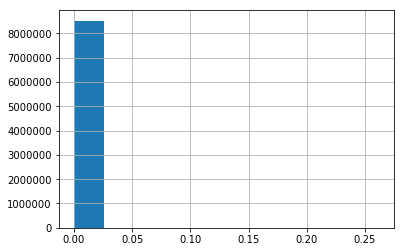

In [9]:
df.eigen.hist()

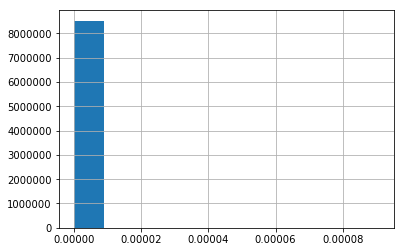

In [10]:
df.pagerank.hist()

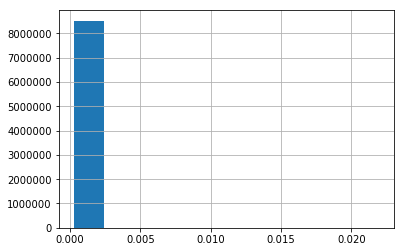

In [11]:
df.katz.hist()

In [12]:
df.corr()

,cit_received,cit_received_delay,parent_citation,pagerank,katz,eigen
cit_received,1.000000,-0.090076,0.717714,0.411790,0.906591,0.003104
cit_received_delay,-0.090076,1.000000,-0.031233,-0.050709,-0.062313,-0.001578
parent_citation,0.717714,-0.031233,1.000000,0.285204,0.932378,0.001695
pagerank,0.411790,-0.050709,0.285204,1.000000,0.362452,0.023605
katz,0.906591,-0.062313,0.932378,0.362452,1.000000,0.002692
eigen,0.003104,-0.001578,0.001695,0.023605,0.002692,1.000000


In [13]:
df.nlargest(15, ['cit_received']) 

,date,cit_received,cit_received_delay,parent_citation,pagerank,katz,eigen
id,,,,,,,
4683202,1987-07-28,3922.0,20.745466,69405.0,0.000051,0.013490,6.380663e-07
5523520,1996-06-04,3433.0,16.014409,15259.0,0.000033,0.010346,0.000000e+00
4683195,1987-07-28,3395.0,20.254774,62948.0,0.000053,0.011809,5.202973e-07
4733665,1988-03-29,2862.0,20.035173,201195.0,0.000014,0.016184,6.015197e-05
5731856,1998-03-24,2602.0,17.179581,15831.0,0.000006,0.008033,1.208419e-13
7674650,2010-03-09,2592.0,5.519403,9509.0,0.000004,0.007820,4.358669e-14
7061014,2006-06-13,2571.0,9.211471,18048.0,0.000005,0.008011,9.336666e-14
7297977,2007-11-20,2556.0,7.810299,16093.0,0.000004,0.007910,7.101849e-14
6294274,2001-09-25,2554.0,13.960473,14905.0,0.000003,0.007870,7.101849e-14


In [14]:
df.nlargest(15, ['parent_citation']) 

,date,cit_received,cit_received_delay,parent_citation,pagerank,katz,eigen
id,,,,,,,
5040715,1991-08-20,1038.0,19.262704,227479.0,1.626112e-06,0.021921,1.563228e-07
4610383,1986-09-09,1015.0,25.231640,212548.0,1.117279e-06,0.020117,4.286639e-07
3490675,NaN,983.0,41.326531,207118.0,2.158011e-06,0.020738,1.908587e-06
4733665,1988-03-29,2862.0,20.035173,201195.0,1.371405e-05,0.016184,6.015197e-05
4429695,1984-02-07,940.0,28.164120,186397.0,1.091825e-06,0.017953,3.859400e-07
5403312,1995-04-04,1468.0,16.962867,176154.0,1.147757e-06,0.013931,1.703039e-07
4728020,1988-03-01,867.0,23.579264,175422.0,7.802500e-07,0.016069,1.013337e-07
5065929,1991-11-19,937.0,21.563810,167870.0,3.810511e-07,0.014055,7.499016e-09
4520817,1985-06-04,733.0,25.286348,165140.0,1.607566e-06,0.017247,3.532413e-07


In [15]:
df.nlargest(15, ['pagerank']) 

,date,cit_received,cit_received_delay,parent_citation,pagerank,katz,eigen
id,,,,,,,
4237224,1980-12-02,307.0,15.259667,8856.0,0.000091,0.001435,6.886717e-07
3813316,NaN,57.0,33.275895,1130.0,0.000078,0.000477,2.168065e-07
4309756,1982-01-05,27.0,13.661492,2299.0,0.000069,0.000464,4.390998e-07
4558413,1985-12-10,1001.0,20.168043,68195.0,0.000067,0.005631,8.797430e-07
4395486,1983-07-26,72.0,12.832420,8832.0,0.000056,0.000791,6.527250e-07
4683195,1987-07-28,3395.0,20.254774,62948.0,0.000053,0.011809,5.202973e-07
3988545,1976-10-26,62.0,15.785948,2841.0,0.000051,0.000567,9.559912e-06
4683202,1987-07-28,3922.0,20.745466,69405.0,0.000051,0.013490,6.380663e-07
4298685,1981-11-03,97.0,13.807146,3824.0,0.000050,0.000692,8.764941e-07


In [16]:
df.nlargest(15, ['katz']) 

,date,cit_received,cit_received_delay,parent_citation,pagerank,katz,eigen
id,,,,,,,
5040715,1991-08-20,1038.0,19.262704,227479.0,1.626112e-06,0.021921,1.563228e-07
3490675,NaN,983.0,41.326531,207118.0,2.158011e-06,0.020738,1.908587e-06
4610383,1986-09-09,1015.0,25.231640,212548.0,1.117279e-06,0.020117,4.286639e-07
4429695,1984-02-07,940.0,28.164120,186397.0,1.091825e-06,0.017953,3.859400e-07
4520817,1985-06-04,733.0,25.286348,165140.0,1.607566e-06,0.017247,3.532413e-07
3079606,NaN,779.0,47.598743,144783.0,2.228731e-06,0.016568,1.899272e-06
4733665,1988-03-29,2862.0,20.035173,201195.0,1.371405e-05,0.016184,6.015197e-05
4728020,1988-03-01,867.0,23.579264,175422.0,7.802500e-07,0.016069,1.013337e-07
4633874,1987-01-06,770.0,24.287290,163757.0,1.178759e-06,0.015687,2.022376e-07


In [17]:
df.nlargest(15, ['eigen']) 

,date,cit_received,cit_received_delay,parent_citation,pagerank,katz,eigen
id,,,,,,,
D234849,NaN,39.0,8.280506,587.0,2.186866e-06,0.000409,0.261595
D218314,NaN,26.0,15.945205,561.0,1.320964e-06,0.000374,0.243567
3444329,NaN,23.0,18.344133,490.0,2.515048e-06,0.000361,0.197560
3558831,NaN,36.0,18.509741,353.0,9.556404e-07,0.000393,0.196097
D234605,NaN,40.0,12.387397,1119.0,2.059429e-06,0.000434,0.182432
3476886,NaN,23.0,18.947826,990.0,2.632558e-06,0.000384,0.161920
D247564,1978-03-21,19.0,7.870368,322.0,1.296802e-06,0.000345,0.157442
D229837,NaN,61.0,13.037323,599.0,1.243112e-06,0.000471,0.152304
D237281,NaN,15.0,5.695708,266.0,1.511075e-06,0.000331,0.151051
